<a href="https://colab.research.google.com/github/cgrundman/nuclear-magnetic-resonance/blob/master/pattern_recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pattern Recognizer

This is the last stage of the Continuous Wave Nuclear Magnatic Resonance Project found at: https://github.com/cgrundman/nuclear-magnetic-resonance. Found in this documentation is merely the information crucial to creating and evaluating the ML model. For more details, please refer to the ``readme`` in the above link.

## Import Libraries

In [125]:
import tensorflow as tf
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import pandas as pd
from google.colab import userdata
import os

## Load Data

In [2]:
# Connect to Kaggle
os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [3]:
# Load dataset from Kaggle
!kaggle datasets download -d christiangrundman/simulated-nmr-data
!unzip -q "simulated-nmr-data.zip"

Dataset URL: https://www.kaggle.com/datasets/christiangrundman/simulated-nmr-data
License(s): MIT
 91% 116M/128M [00:01<00:00, 82.3MB/s]
100% 128M/128M [00:01<00:00, 89.6MB/s]


## Visualize Data

In [4]:
train_dir = "/content/processed_nmr_data/"

Text(0.5, 1.08, 'Material Samples')

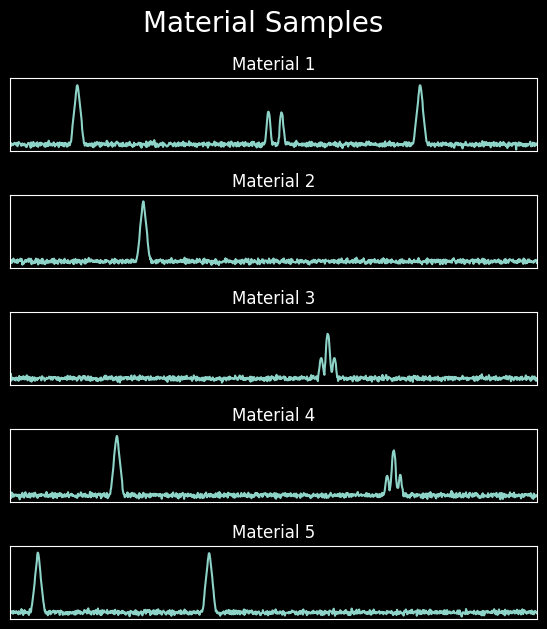

In [19]:
# Plot data examples
plt.style.use('dark_background')
fig, axs = plt.subplots(5, 1, figsize=(6, 6))
fig.tight_layout()

for i, row in enumerate(axs):
    file = f"0000_Material_{i+1}.txt"
    freq = np.linspace(16, 20, num=1200)
    load_data = np.loadtxt(train_dir + file)
    row.title.set_text(f"Material {i+1}")
    row.plot(freq, load_data)
    row.set_xticks([])
    row.set_yticks([])
    row.set_xlim([16, 20])
    row.set_ylim([.25, 3])
plt.suptitle("Material Samples", fontsize=20, y='1.08')

## Data Processing

In [118]:
# Merge data set into a single list
data = []
mat_labels = []
directory = '/content/processed_nmr_data'

for file in os.listdir(directory):
  path = directory + '/' + file
  # single_file = pd.read_csv(path,
  #                           names=[path[33:-4]])
  # data.append(single_file)

  mat_labels.append(int(path[-5:-4]))

  text_file = open(path, "r")
  lines = text_file.read().split('\n')
  data.append(lines)
  text_file.close()

# Display data sizes
print(f"Rows: {len(data)}")
print(f"Columns: {len(data[0])}")

Rows: 10000
Columns: 1201


In [119]:
# Convert list into a datframe
df = pd.DataFrame(data) # , columns=headers)
# df = df.T # transpose the dataframe
# df.columns = headers # add material labels to the columns
df.insert(0, "Material", mat_labels)

In [120]:
# Display head of data
df.head()

,Material,0,1,2,3,4,5,6,7,8,...,1191,1192,1193,1194,1195,1196,1197,1198,1199,1200
0,3,5.099635531039867775e-01,4.259899232656116363e-01,4.872865035230480868e-01,4.095899275359281000e-01,5.003475815002160765e-01,4.740811751724720025e-01,4.598702664990259592e-01,5.281391103511908769e-01,5.890365559873929069e-01,...,4.758096074047976631e-01,4.705663119159274599e-01,5.346704502967899453e-01,5.100814306995686831e-01,5.084429675448193242e-01,5.295044466026350705e-01,5.603700699786109407e-01,4.958790588490243345e-01,5.051363888651561052e-01,
1,2,5.208074303213271472e-01,5.340265354641413609e-01,4.875087792044426327e-01,5.419421718205593708e-01,4.581919855934588615e-01,4.863701160012834923e-01,5.087104318565901506e-01,5.462732305131342558e-01,5.356945424868039263e-01,...,5.197010528420948905e-01,5.764432656189291126e-01,5.671908339818600986e-01,3.927843012511041954e-01,4.321441611053037368e-01,5.506626448469870150e-01,4.778565115361006477e-01,5.530372881607035218e-01,4.632082461702312082e-01,
2,1,4.763196802267175012e-01,4.555598849277661677e-01,5.007819959560096956e-01,6.008921602321242172e-01,5.850322758712533933e-01,4.312474974306323428e-01,5.532431639509793886e-01,5.744154645646103452e-01,5.973843442891920708e-01,...,4.522622555128952837e-01,6.185034544793752698e-01,4.145277392303322039e-01,4.805555207188187405e-01,4.171811595907028436e-01,5.343162498217304268e-01,4.736162293357527031e-01,5.209304095131944701e-01,4.807426182669604087e-01,
3,5,4.971668621677577393e-01,4.613040172671468153e-01,4.545169109818886777e-01,4.636751595344413834e-01,5.241662007022673819e-01,4.886196911076000071e-01,5.809120041799866740e-01,4.738663384675903534e-01,4.385488510088815794e-01,...,5.259293902006629828e-01,5.425607168444772643e-01,4.439177374723251024e-01,5.363871849768062638e-01,5.458452626935531571e-01,5.387833521390670288e-01,5.442757890863031411e-01,5.327099761697892122e-01,4.674423267192874820e-01,
4,1,5.453721102916111452e-01,5.212446206785046332e-01,4.765605098278215546e-01,5.468513264987706624e-01,3.909603773337508859e-01,4.825047222684482051e-01,4.333858411807059441e-01,5.360526934081843997e-01,5.351630607973177911e-01,...,4.592337876027559607e-01,5.083675646559970840e-01,4.694636357588378162e-01,5.334873918475371291e-01,5.655774389781625944e-01,3.985105990540320220e-01,4.714655779774298838e-01,5.704145448686410713e-01,4.907566648942509047e-01,


### Train/Test/Validate Split

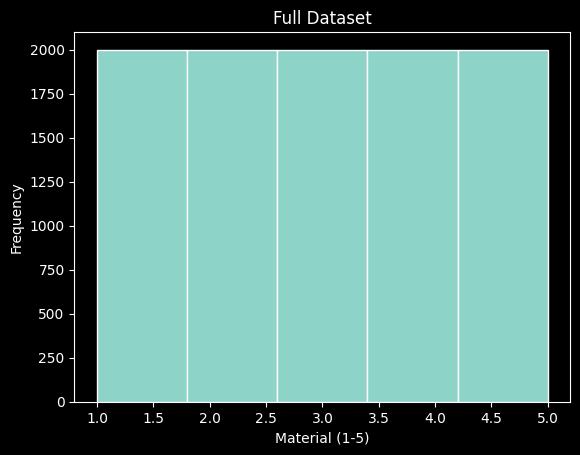

In [147]:
# Display historgram of full dataset
hist = df.hist(bins=5,
               grid=False,
               edgecolor='white')

for ax in hist.flatten():
    ax.set_xlabel("Material (1-5)")
    ax.set_ylabel("Frequency")
    ax.set_title("Full Dataset")

In [150]:
# Define 80/10/10 Train/Test/Valitation split
training_size = int(len(df)*0.80)
test_size = int(len(df)*0.10)

#Defining the Length of data.
data_len = len(df)

# Defining Training and Testing Data.
train = df[0:training_size]
test = df[training_size:data_len-test_size]
validate = df[data_len-test_size:data_len]

In [151]:
print("total length of data --> ", data_len)
print("Train length --> ", len(train))
print("Test length --> ", len(test))
print("Validation length --> ", len(validate))

total length of data -->  10000
Train length -->  8000
Test length -->  1000
Validation length -->  1000


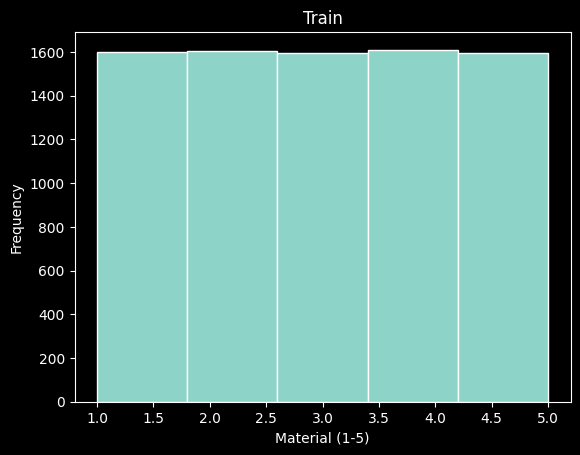

In [154]:
# Display train historgram
hist = train.hist(bins=5,
               grid=False,
               edgecolor='white')

for ax in hist.flatten():
    ax.set_xlabel("Material (1-5)")
    ax.set_ylabel("Frequency")
    ax.set_title("Train")

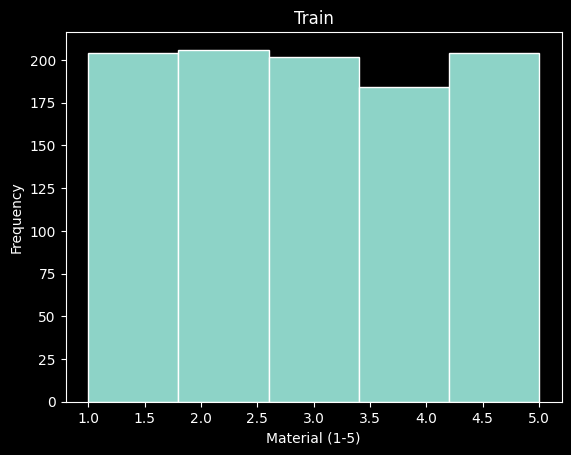

In [155]:
# Display test historgram
hist = test.hist(bins=5,
               grid=False,
               edgecolor='white')

for ax in hist.flatten():
    ax.set_xlabel("Material (1-5)")
    ax.set_ylabel("Frequency")
    ax.set_title("Train")

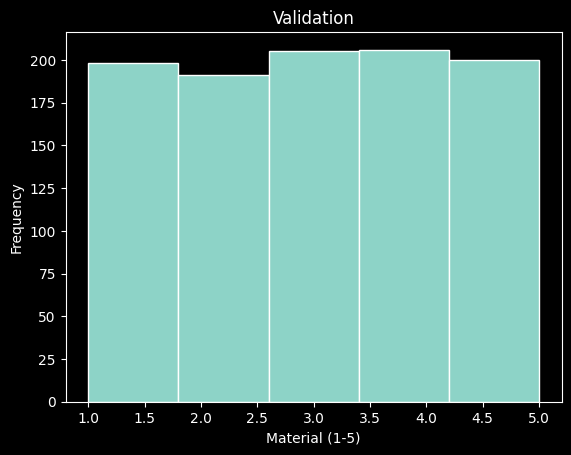

In [157]:
# Display test historgram
hist = validate.hist(bins=5,
               grid=False,
               edgecolor='white')

for ax in hist.flatten():
    ax.set_xlabel("Material (1-5)")
    ax.set_ylabel("Frequency")
    ax.set_title("Validation")

## Model 1

### Create Model 1

In [ ]:
# Model 1
from keras.losses import CategoricalCrossentropy
from keras.optimizers import Adam

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1200, activation="relu"),
    tf.keras.layers.Dense(5, activation="softmax"),
])

# 2. Compile the model
model_1.compile(loss=CategoricalCrossentropy(),
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit("training data",
                        "tf.one_hot(train_labels, depth=10)",
                        epochs=2,
                        something="validation_data")

### Summerize Model 1

In [ ]:
# Get a model summary
model_1.summary()

### Evaluate Model 1

In [ ]:
# Evaluate Model_1
model_1.evaluate("test data")

## Model 2

### Create Model 2

In [ ]:
## TODO Create Model 2

### Summarize Model 2

### Evaluate Model 2

## Model 3

### Create Model 3

In [ ]:
## TODO Create Model 3

### Summarize Model 3

### Evaluate Model 3

## Compare Model Performance

In [ ]:
# Create Comparison of Models

## Conclusion

In [ ]:
# TODO conclude results of experiment